In [79]:
import plotly.plotly as py
import plotly.figure_factory as ff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline



In [4]:
df = pd.read_csv("training_switch_ratio_with_factors_after_dummy.csv", index_col = "id")
df.drop("Unnamed: 0",axis=1, inplace=True)
df.shape
print(df.head())

    num_switch  switch_ratio  ifswitch  headHouseholdPast  fatherNumEmployees  \
id                                                                              
1            0      0.000000         0                1.0                 NaN   
2            2      0.181818         1                1.0                 NaN   
3            1      0.100000         1                1.0                 NaN   
4            0      0.000000         0                1.0                 NaN   
5            1      0.500000         1                1.0                 NaN   

    motherNumEmployees  profile_socialgrade_cie  personality_agreeableness  \
id                                                                           
1                  NaN                      NaN                        7.0   
2                  NaN                      NaN                        6.0   
3                  NaN                      NaN                        6.0   
4                  NaN                    

(51470, 818)


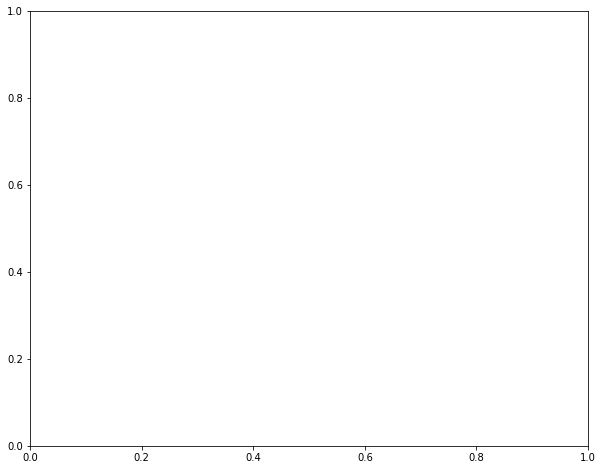

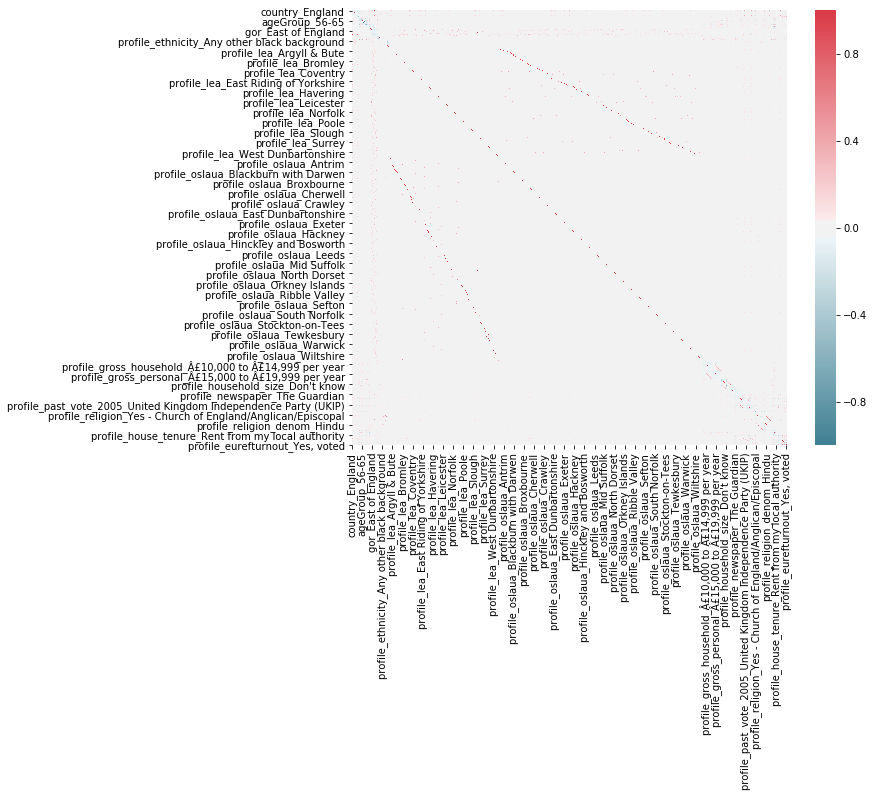

In [78]:
X_train = df.loc[:,"headHouseholdPast":]
X_train.dropna(axis=1, how='any', inplace = True)
X_train.dropna(axis=0, how='any', inplace = True)
print(X_train.shape)
forest = RandomForestClassifier(n_estimators = 1000, random_state=1)

feat_labels = df.columns[df.columns.get_loc("headHouseholdPast"):]

y_train = df.loc[:,"num_switch"]

In [27]:
forest.fit(X_train, y_train)

importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) countryOfBirth_England         0.010316
 2) profile_socialgrade_cie        0.009838
 3) disability_Yes, limited a little 0.009823
 4) disability_Yes, limited a lot  0.009741
 5) profile_household_children_0   0.009562
 6) profile_past_vote_2010_Don't know 0.009055
 7) profile_past_vote_2015_Other   0.008761
 8) profile_past_vote_2015_United Kingdom Independence Party (UKIP) 0.008727
 9) gor_South East                 0.008351
10) profile_gross_personal_Â£30,000 to Â£34,999 per year 0.008090
11) profile_past_vote_2015_Liberal Democrat 0.008069
12) gor_Northern Ireland           0.007938
13) ageGroup_46-55                 0.007747
14) profile_newspaper_The Scotsman 0.007702
15) gor_North West                 0.007641
16) profile_house_tenure_Own outright 0.007554
17) profile_past_vote_2005_Scottish National Party 0.007361
18) profile_past_vote_2005_Labour Party 0.007345
19) profile_past_vote_2015_Green Party 0.007304
20) profile_oslaua_Worthing        0.007082
21) profile_gross_house

288) profile_lea_Perth & Kinross    0.000695
289) profile_oslaua_Barking and Dagenham 0.000692
290) profile_oslaua_Huntingdonshire 0.000692
291) profile_oslaua_Dartford        0.000687
292) profile_lea_Croydon            0.000687
293) profile_lea_Norfolk            0.000685
294) profile_oslaua_Cannock Chase   0.000685
295) profile_oslaua_City of London  0.000682
296) profile_lea_Solihull           0.000682
297) profile_lea_Swindon            0.000681
298) profile_lea_Ceredigion         0.000679
299) profile_oslaua_Northampton     0.000676
300) profile_oslaua_Enfield         0.000676
301) profile_lea_Renfrewshire       0.000675
302) profile_religion_Yes - Islam   0.000672
303) profile_lea_Bristol            0.000670
304) profile_past_vote_2010_Plaid Cymru 0.000665
305) country_England                0.000665
306) profile_oslaua_Arun            0.000663
307) profile_oslaua_Rushcliffe      0.000663
308) profile_lea_East Lothian       0.000662
309) profile_oslaua_Norwich         0.000659
3

NameError: name 'plt' is not defined

In [47]:
# plt.title('Feature Importance')
# X_train_short = X_train[:11]
# importances_short = importances[:11]
# plt.bar(range(X_train_short.shape[1]), 
#         importances_short[:11][indices],
#         align='center')

# plt.xticks(range(X_train_short.shape[1]), 
#            feat_labels[indices][:11], rotation=90)
# plt.xlim([-1, X_train.shape[1]])
# #plt.tight_layout()
# #plt.savefig('images/04_09.png', dpi=300)
# plt.show()

IndexError: index 12 is out of bounds for axis 1 with size 11

In [81]:
sorted_feat_labels = feat_labels[indices][:]
sorted_feat_labels = sorted_feat_labels[:20]
print(sorted_feat_labels)
X_train = df.loc[:,sorted_feat_labels]
X_train.dropna(axis=1, how='any', inplace = True)
X_train.dropna(axis=0, how='any', inplace = True)

forest = RandomForestClassifier(n_estimators = 1000, random_state=1)
forest.fit(X_train, y_train)
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

Index(['countryOfBirth_England', 'profile_socialgrade_cie',
       'disability_Yes, limited a little', 'disability_Yes, limited a lot',
       'profile_household_children_0', 'profile_past_vote_2010_Don't know',
       'profile_past_vote_2015_Other',
       'profile_past_vote_2015_United Kingdom Independence Party (UKIP)',
       'gor_South East',
       'profile_gross_personal_Â£30,000 to Â£34,999 per year',
       'profile_past_vote_2015_Liberal Democrat', 'gor_Northern Ireland',
       'ageGroup_46-55', 'profile_newspaper_The Scotsman', 'gor_North West',
       'profile_house_tenure_Own outright',
       'profile_past_vote_2005_Scottish National Party',
       'profile_past_vote_2005_Labour Party',
       'profile_past_vote_2015_Green Party', 'profile_oslaua_Worthing'],
      dtype='object')
 1) countryOfBirth_England         0.010316
 2) profile_socialgrade_cie        0.009838
 3) disability_Yes, limited a little 0.009823
 4) disability_Yes, limited a lot  0.009741
 5) profile_hous

In [88]:
y_train2 = df.loc[:,"ifswitch"]
forest2 = RandomForestClassifier(n_estimators = 1000, random_state=1)
forest2.fit(X_train, y_train2)

importances2 = forest2.feature_importances_
indices2 = np.argsort(importances2)[::-1]

print(X_train.shape)
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices2[f]], 
                            importances2[indices2[f]]))

(51470, 19)
 1) headHouseholdPast              0.244797
 2) country_Wales                  0.073187
 3) profile_socialgrade_cie        0.062017
 4) fatherNumEmployees             0.061723
 5) personality_openness           0.058183
 6) countryOfBirth_Other: Rest of world 0.057550
 7) countryOfBirth_Other: Commonwealth member country 0.057127
 8) personality_neuroticism        0.054835
 9) motherNumEmployees             0.050425
10) countryOfBirth_Northern Ireland 0.049709
11) country_England                0.046562
12) personality_extraversion       0.043033
13) personality_agreeableness      0.036375
14) countryOfBirth_Prefer not to answer 0.028755
15) countryOfBirth_Other: European Union member country 0.025783
16) personality_conscientiousness  0.023534
17) countryOfBirth_England         0.018897
18) countryOfBirth_Republic of Ireland 0.007451
19) country_Scotland               0.000057


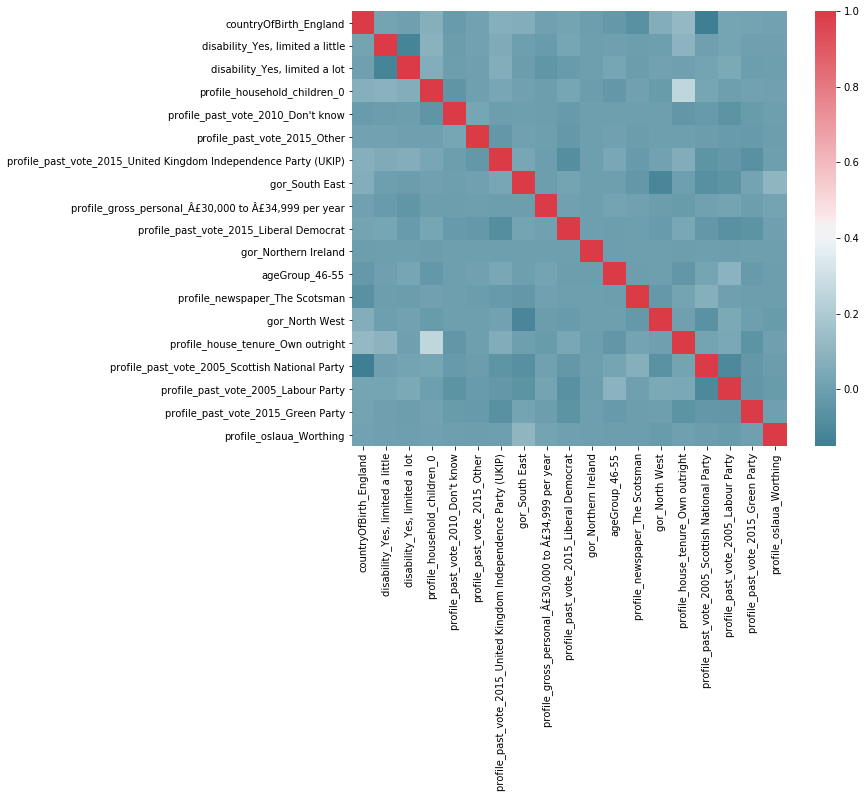

In [83]:
f, ax = plt.subplots(figsize=(10, 8))
corr = X_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

In [2]:
df.shape

NameError: name 'df' is not defined